<h1 align='center'> Pandas Q/A </h1>

<h4> Installing Dependencies </h4>
    <p> We are going to import dependencies that we will use for all the cells below </p>



In [1]:
import pandas as pd
import random

<h5>Q.1 Generate A Data Frame with 2 columns 'A','B' and random values in both columns and save it as 'Data.csv'</h5>

In [27]:
def generate_random_dataframe(path):
    df=pd.DataFrame({
        'A':[random.randrange(-10,i) for i in range(0,150)],
        'B':[random.randrange(-10,i) for i in range(0,150)]
    })
    df.to_csv(path.split('.')[0]+'.csv',index=False)
    return df

generate_random_dataframe('Data')

,A,B
0,-1,-2
1,-9,-10
2,-3,-9
3,0,-4
4,-8,-7
...,...,...
145,1,51
146,39,39
147,130,44
148,77,59


<h5> Q.2. Read the Provided DataFrame and Get Max from both Columns </h5>

In [31]:
df=pd.read_csv('Data.csv')

#Approach 1
print(max(df['A'].to_list()),max(df['B'].to_list()))

#Approach 2
display(df.max())

130 122


A    130
B    122
dtype: int64

<h5>Q.3. Get Max and Min value from getting index with max and min value using idxmax and idxmin </h5>

In [39]:
data=pd.read_csv('Data.csv')
max_A_B=[data['A'].iloc[data['A'].idxmax()],data['B'].iloc[data['B'].idxmax()]]
min_A_B=[data['A'].iloc[data['A'].idxmin()],data['B'].iloc[data['B'].idxmin()]]
print(f'Max Values: {max_A_B}\nMinValues: {min_A_B}')


Max Values: [130, 122]
MinValues: [-10, -10]


<h5>Q.4. create new columns derived from existing columns in Pandas? C=A*B, D=A+B </h5>

In [46]:
data['C']=data['A']*data['B']
data['D']=data['A']+data['B']
data.to_csv('Data.csv',index=False)
display(data)

,A,B,C,D
0,-1,-2,2,-3
1,-9,-10,90,-19
2,-3,-9,27,-12
3,0,-4,0,-4
4,-8,-7,56,-15
...,...,...,...,...
145,1,51,51,52
146,39,39,1521,78
147,130,44,5720,174
148,77,59,4543,136


<h5>Q.5. Implement this: <br><br> <img src='https://user-images.githubusercontent.com/53355899/144045594-1a5c3f78-4250-4ed8-9de3-ca3689fe08bf.png'>

In [87]:
def generate_dataframe():
    df=pd.DataFrame({
        'key':['A','B','C','A','B','C','A','B','C'],
        'data':[0,5,10,5,10,15,10,15,20]
    })
    return df

new_data=generate_dataframe()
new_data=new_data.groupby('key')['data'].sum()
display(new_data)


key
A    15
B    30
C    45
Name: data, dtype: int64

<h5>Q.6. Apply map() to change name in a provided DataFrame </h5>

In [6]:
def new_dataframe_for_map():
    df=pd.DataFrame({
        'n_key':['apple','ball','cat'],
        'val':[1,3,4]
    })


    df['n_key']=df['n_key'].map({'apple':'macbook','ball':'ball','cat':'meow'})
    return df 

display(new_dataframe_for_map())

,n_key,val
0,macbook,1
1,ball,3
2,meow,4


<h5>Q.7. Concat Exercise </h5>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  7.1 Concat Outer Union:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; By Default Concate is done with outer union which is union

In [16]:
def combine_dataframes(df1,df2,flag):
    return pd.concat([df1,df2],ignore_index=True,join=flag)

data_frame_1=pd.DataFrame({
    'A':[random.randrange(-5,i) for i in range(0,15)],
    'B':[random.randrange(-5,i) for i in range(0,15)]
})

data_frame_2=pd.DataFrame({
    'A':[random.randrange(-5,i) for i in range(0,15)],
    'B':[random.randrange(-5,i) for i in range(0,15)]
})

print('DataFrame_1')
display(data_frame_1)

print('DataFrame_2')
display(data_frame_2)

result=combine_dataframes(data_frame_1,data_frame_2,'outer')
display(result)

DataFrame_1


,A,B
0,-4,-5
1,0,-1
2,-2,-1
3,2,-3
4,2,-5
5,-1,0
6,5,5
7,2,-1
8,-3,7
9,1,-2


DataFrame_2


,A,B
0,-4,-5
1,-4,0
2,-1,-5
3,0,0
4,-2,-3
5,-3,-1
6,5,0
7,-5,-5
8,7,-2
9,-4,-2


,A,B
0,-4,-5
1,0,-1
2,-2,-1
3,2,-3
4,2,-5
5,-1,0
6,5,5
7,2,-1
8,-3,7
9,1,-2


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  7.2 Concat Inner Union:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Using join='inner' sets the concatination as intersection  

In [25]:
data_frame_1=pd.DataFrame({
    'A': [1,2,3,4,1],
    'B': [2,3,4,1,5]
})

data_frame_2=pd.DataFrame({
    'C': [5,2,4,3,2],
    'D': [1,2,3,4,1]
})
result=pd.concat([data_frame_1,data_frame_2],join='inner',axis=1,ignore_index=True)
display(result)

,0,1,2,3
0,1,2,5,1
1,2,3,2,2
2,3,4,4,3
3,4,1,3,4
4,1,5,2,1


<h5>Q.8. Merge operations </h5>

In [32]:
data_frame_1=pd.DataFrame({
   'key':['k0','k1','k2','k3'],
   'A':['A0','A1','A2','A3'],
   'B':['B0','B1','B2','B3'],
   
})

data_frame_2=pd.DataFrame({
   'key':['k0','k1','k2','k3'],
   'C':  ['C0','C1','C2','C3'],
   'D':  ['D0','D1','D2','D3']
})

pd.merge(data_frame_1,data_frame_2,on=['key'])


,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3


<h5>Q.9. Join Operations </h5>

In [34]:
left=pd.DataFrame({
    'A':['A0','A1','A2'],
    'B':['B0', 'B1', 'B2']
})

right=pd.DataFrame({
    'C':['C0','C1','C2'],
    'D': ['D0','D1','D2']
})

left.join(right)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2


<h5>Q.10 Apply Operation </h5>

During Data Entry from a Database there was error in providing student name such that while typing 'a' they typed 'e' Like shown in the figure:<br> <br>
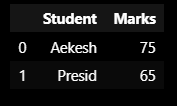

Solve This to have Names as 'Aakash' and 'Prasid'

In [39]:
def replace_a_e(X):
    return X.replace('e','a')


df=pd.DataFrame({
    'Student':['Aekesh','Presid'],
    'Marks':[75,65]
})

print('Original DataFrame: ')
display(df)
df['Student']=df['Student'].apply(replace_a_e)
print('Final DataFrame: ')
display(df)

Original DataFrame: 


,Student,Marks
0,Aekesh,75
1,Presid,65


Final DataFrame: 


,Student,Marks
0,Aakash,75
1,Prasid,65


<h3>Q.11 Using zip function create a dictionary and convert it to dataframe </h3>

In [18]:
keys=['Apple','Ball','Cat']
values=[1,5,7]
dct={}
for i in zip(keys,values):
    dct[i[0]]=i[1]

df=pd.DataFrame.from_dict(dct,orient='index')
df

,0
Apple,1
Ball,5
Cat,7
